In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from scipy.interpolate import griddata

import data, figures

In [21]:
current_density_df_ground = pd.read_csv( data.DIR_PATH / 'J_ground_terminal.csv', skiprows=7)

current_density_df_ground = current_density_df_ground.rename(columns={'% y': 'y'})
current_density_df_ground = current_density_df_ground.rename(columns={'IsoLevel': 'J'})
current_density_df_ground



,y,z,J
0,0.070316,-0.056187,-1.746529e+07
1,0.070316,-0.056393,-1.746529e+07
2,0.070316,-0.056599,-1.746529e+07
3,0.070316,-0.056806,-1.746529e+07
4,0.070316,-0.057012,-1.746529e+07
...,...,...,...
50569,0.070316,0.021797,-6.808708e+06
50570,0.070679,0.021778,-6.755022e+06
50571,0.070679,0.021778,-6.808708e+06
50572,0.070316,0.021797,-6.755022e+06


In [17]:
current_density_df_input = pd.read_csv( data.DIR_PATH / 'J_positive_terminal_2.csv', skiprows=7)
current_density_df_input = current_density_df_input.rename(columns={'% z': 'z'})
current_density_df_input = current_density_df_input.rename(columns={'IsoLevel': 'J'})
current_density_df_input

,z,y,J
0,0.129995,0.074500,1.747778e+07
1,0.129789,0.074500,1.747778e+07
2,0.129583,0.074500,1.747778e+07
3,0.129377,0.074500,1.747778e+07
4,0.129171,0.074500,1.747778e+07
...,...,...,...
34013,0.122914,0.075654,1.740571e+07
34014,0.122872,0.075625,1.747778e+07
34015,0.122873,0.075767,1.747778e+07
34016,0.122872,0.075625,1.740571e+07


In [50]:
particle_data_dir = data.DIR_PATH / 'particle_data_trimmed'

particle_data_files = [f for f in particle_data_dir.glob('*.csv') if not f.name.endswith('frozen.csv')]

# Also exculde constantsa_test21.csv 
particle_data_files = [f for f in particle_data_files if not f.name.endswith('constants_test21.csv')]

# Now, let's load all the dataframes and extract the endpoints of the particles
endpoints = {}
startpoints = {}

for f in particle_data_files:
    print(f)
    df = pd.read_csv(f)
    endpoints[int(f.stem.split('_')[-1])] = df.iloc[-1]
    startpoints[int(f.stem.split('_')[-1])] = df.iloc[0]
    
    print(f'Starting point for particle {f.stem}: {df.iloc[0]}')
    print(f'Ending point for particle {f.stem}: {df.iloc[-1]}')

/home/philo/projects/qpole_wire_stretching/data/particle_data_trimmed/particle_581.csv
Starting point for particle particle_581: x    0.103449
y    0.075021
z    0.118149
Name: 0, dtype: float64
Ending point for particle particle_581: x    0.103449
y    0.070698
z   -0.045912
Name: 22128, dtype: float64
/home/philo/projects/qpole_wire_stretching/data/particle_data_trimmed/particle_102.csv
Starting point for particle particle_102: x    0.103449
y    0.075689
z    0.061208
Name: 0, dtype: float64
Ending point for particle particle_102: x    0.103449
y    0.071336
z    0.011293
Name: 10982, dtype: float64
/home/philo/projects/qpole_wire_stretching/data/particle_data_trimmed/particle_203.csv
Starting point for particle particle_203: x    0.103449
y    0.074765
z    0.090898
Name: 0, dtype: float64
Ending point for particle particle_203: x    0.103449
y    0.070605
z   -0.018455
Name: 13883, dtype: float64
/home/philo/projects/qpole_wire_stretching/data/particle_data_trimmed/particle_229.cs

In [19]:
endpoints_df = pd.DataFrame(endpoints).T
startpoints_df = pd.DataFrame(startpoints).T

In [52]:
endpoints_df

,x,y,z
581,0.103449,0.070698,-0.045912
102,0.103449,0.071336,0.011293
203,0.103449,0.070605,-0.018455
229,0.103449,0.070657,-0.025957
338,0.103449,0.070667,-0.008975
...,...,...,...
583,0.103449,0.071059,-0.042277
492,0.103449,0.070930,-0.043673
216,0.103449,0.070738,-0.005995
399,0.103449,0.070698,-0.001500


In [ ]:
startpoints_df

,x,y,z
581,0.103449,0.075021,0.118149
102,0.103449,0.075689,0.061208
203,0.103449,0.074765,0.090898
229,0.103449,0.074997,0.098153
338,0.103449,0.074686,0.080788
...,...,...,...
583,0.103449,0.075284,0.114883
492,0.103449,0.075242,0.115729
216,0.103449,0.074999,0.078391
399,0.103449,0.074998,0.074003


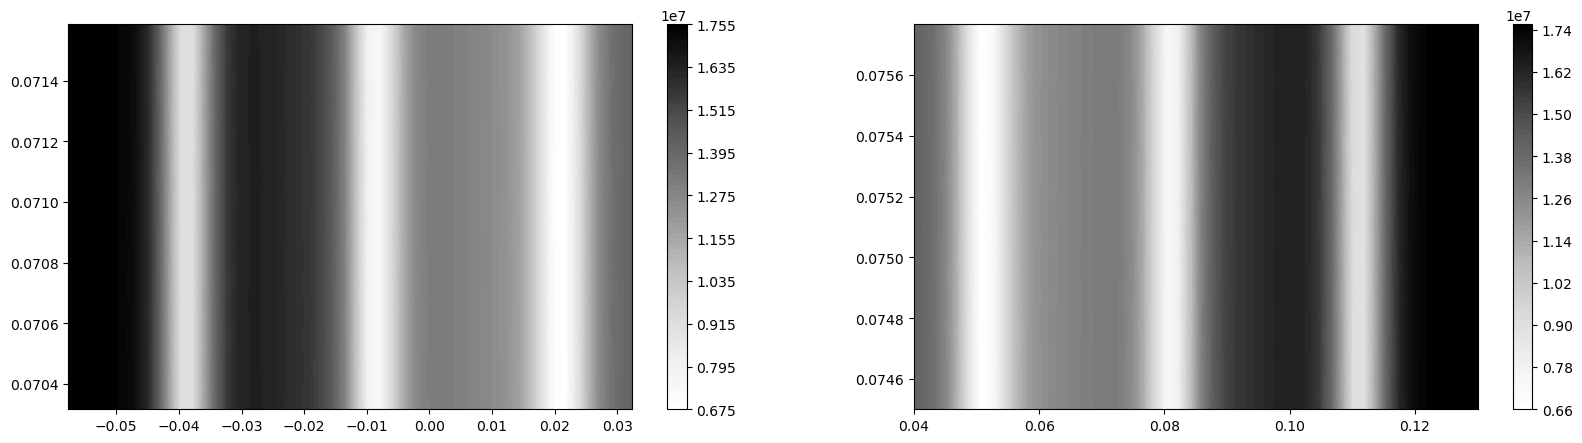

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].tricontourf(current_density_df_ground['z'], current_density_df_ground['y'], -current_density_df_ground['J'], levels=100, cmap='Grays')
axs[1].tricontourf(current_density_df_input['z'], current_density_df_input['y'], current_density_df_input['J'], levels=100, cmap='Grays')

# Put the colorbar next to each plot
fig.colorbar(axs[0].collections[0], ax=axs[0])
fig.colorbar(axs[1].collections[0], ax=axs[1])

Text(0.5, 1.0, 'Current Density on the Surface of the input Terminal')

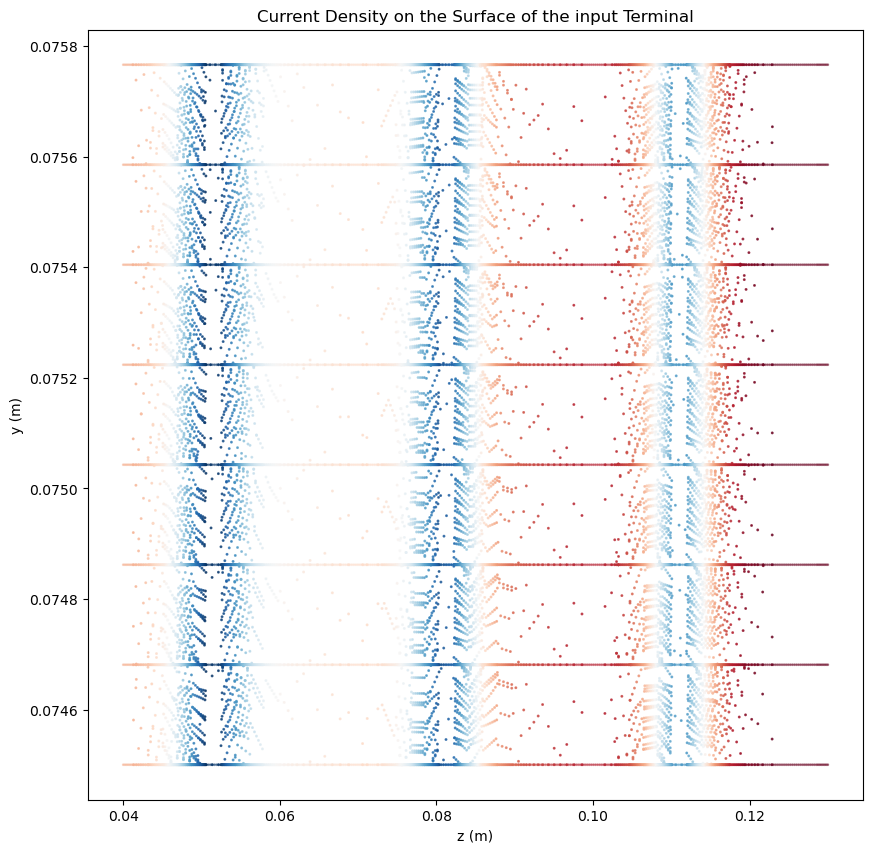

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(current_density_df_input['z'], current_density_df_input['y'], c=current_density_df_input['J'], cmap='RdBu_r', s=1, alpha=0.5)
# Let's  make a tricontour plot 

# cont = ax.tricontourf(current_density_df_input['z'], current_density_df_input['y'], current_density_df_input['J'], cmap='RdBu_r', levels=100)

# Add a colorbar
# fig.colorbar(contour, ax=ax, label='Current Density (A/m^2)')
ax.set_xlabel('z (m)')
ax.set_ylabel('y (m)')
ax.set_title('Current Density on the Surface of the input Terminal')

Text(0.5, 1.0, 'Current Density on the Surface of the Ground Terminal')

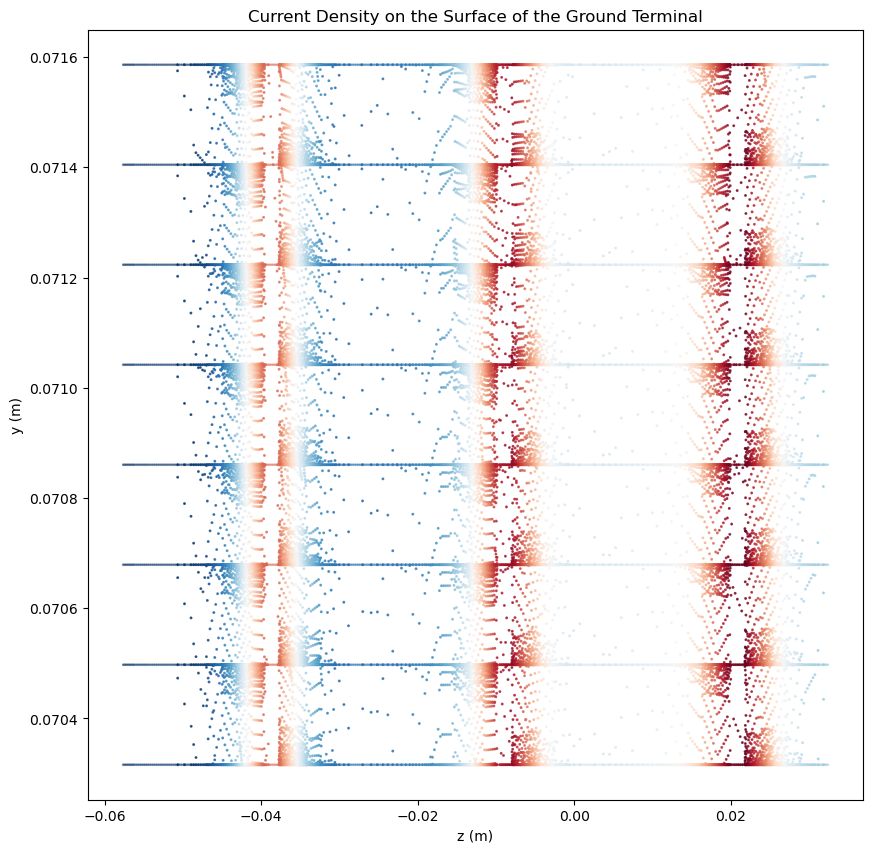

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(current_density_df_ground['z'], current_density_df_ground['y'], c=current_density_df_ground['J'], cmap='RdBu_r', s=1, alpha=0.5)

# Add a colorbar
# fig.colorbar(contour, ax=ax, label='Current Density (A/m^2)')
ax.set_xlabel('z (m)')
ax.set_ylabel('y (m)')
ax.set_title('Current Density on the Surface of the Ground Terminal')

In [ ]:
# First, let's create a uniform grid
y_grid_ground = np.linspace(current_density_df_ground['y'].min(), current_density_df_ground['y'].max(), 5000)
z_grid_ground = np.linspace(current_density_df_ground['z'].min(), current_density_df_ground['z'].max(), 5000)

dy = y_grid_ground[1] - y_grid_ground[0]
dz = z_grid_ground[1] - z_grid_ground[0]
print(f'dy = {dy}, dz = {dz}')

# Now, let's create a meshgrid
Y_ground, Z_ground = np.meshgrid(y_grid_ground, z_grid_ground)

# Now, let's interpolate the current density data to the uniform grid
J_grid_ground = griddata((current_density_df_ground['y'], current_density_df_ground['z']), current_density_df_ground['J'], (Y_ground, Z_ground), method='linear')
print(J_grid_ground.shape)
print(J_grid_ground)

dy = 2.540528105665629e-07, dz = 1.8003600720142843e-05
(5000, 5000)
[[               nan -17465289.94143819 -17465289.94143819 ...
  -17465289.94143819 -17465289.94143819 -17465289.94143819]
 [-17465289.94143819 -17465289.94143819 -17465289.94143819 ...
  -17465289.94143819 -17465289.94143819 -17465289.94143819]
 [-17465289.94143819 -17465289.94143819 -17465289.94143819 ...
  -17465289.94143819 -17465289.94143819 -17465289.94143819]
 ...
 [-14056257.29217963 -14056257.29217963 -14056257.29217963 ...
  -14056257.29217963 -14056257.29217963 -14056257.29217963]
 [-14056257.29217963 -14056257.29217963 -14056257.29217963 ...
  -14056257.29217963 -14056257.29217963 -14056257.29217963]
 [-14056257.29217963 -14056257.29217963 -14056257.29217963 ...
  -14056257.29217963 -14056257.29217963 -14056257.29217963]]


In [31]:
# First, let's create a uniform grid
y_grid_input = np.linspace(current_density_df_input['y'].min(), current_density_df_input['y'].max(), 5000)
z_grid_input = np.linspace(current_density_df_input['z'].min(), current_density_df_input['z'].max(), 5000)

dy = y_grid_input[1] - y_grid_input[0]
dz = z_grid_input[1] - z_grid_input[0]
print(f'dy = {dy}, dz = {dz}')

# Now, let's create a meshgrid
Y_input, Z_input = np.meshgrid(y_grid_input, z_grid_input)

# Now, let's interpolate the current density data to the uniform grid
J_grid_input = griddata((current_density_df_input['y'], current_density_df_input['z']), current_density_df_input['J'], (Y_input, Z_input), method='linear')
print(J_grid_input.shape)
print(J_grid_input)

dy = 2.532906581281802e-07, dz = 1.8003600720142843e-05
(5000, 5000)
[[              nan               nan               nan ...
                nan               nan               nan]
 [14018530.14121036 14018530.14121036 14018530.14121036 ...
  14018530.14121036 14018530.14121036 14018530.14121036]
 [14018530.14121036 14018530.14121036 14018530.14121036 ...
  14018530.14121036 14018530.14121036 14018530.14121036]
 ...
 [17477776.40459121 17477776.4045912  17477776.40459121 ...
  17477776.40459121 17477776.40459121 17477776.40459121]
 [17477776.40459121 17477776.40459121 17477776.40459121 ...
  17477776.40459121 17477776.40459121 17477776.40459121]
 [              nan               nan               nan ...
  17477776.40459121 17477776.40459121 17477776.40459121]]


In [61]:
hist, y_edges, z_edges = np.histogram2d(endpoints_df['y'], endpoints_df['z'], bins=(y_grid_ground, z_grid_ground))
max_wire_endpoints_per_voxel = hist.max()
print(max_wire_endpoints_per_voxel)

1.0


In [62]:
# Convert endpoint coordinates to voxel indices
y_indices = np.digitize(endpoints_df['y'], y_grid_ground) - 1
z_indices = np.digitize(endpoints_df['z'], z_grid_ground) - 1
    
# Create an array of (y, z) voxel positions
voxel_positions = np.column_stack((y_indices, z_indices))
    
# Compute the Chebyshev distance between all pairs
min_distance = np.inf
num_points = len(voxel_positions)

# Compute the minimum wire distance in voxels
for i in range(num_points):
    for j in range(i + 1, num_points):  # Avoid duplicate comparisons
        dist = np.max(np.abs(voxel_positions[i] - voxel_positions[j]))
        min_distance = min(min_distance, dist)

min_wire_distance_voxels = min_distance
print(min_wire_distance_voxels)

3


In [64]:
# Now, let's develop an algorithm that would assign a current value for each wire endpoint by integrating the current density over the 9 voxels surrendoung the endpoint (including the voxel the endpoint is in)
# The calculation for i would be i = sum(J_grid[voxel] * dy * dz) for voxel in voxels_surrounding_i

# Let's create a new column in the endpoints_df dataframe to store the current values
endpoints_df['I'] = 0.0

# Now, let's iterate over all the endpoints and calculate the current value
for i, endpoint in endpoints_df.iterrows():
    y_index = np.digitize(endpoint['y'], y_grid_ground) - 1
    z_index = np.digitize(endpoint['z'], z_grid_ground) - 1
    # Let's check if this is working
    # print(f'Endpoint {i} is in voxel ({y_index}, {z_index})')
    # print(f'Point coords = ({endpoint["y"]}, {endpoint["z"]})')
    # print(f'Voxel coords = ({y_grid[y_index]}, {z_grid[z_index]})')
    
    voxels_surrounding_i = [(y, z) for y in range(y_index - 1, y_index + 2) for z in range(z_index - 1, z_index + 2) if 0 <= y < len(y_grid_ground) and 0 <= z < len(z_grid_ground)]
    # print(f'Voxels surrounding {i} = {voxels_surrounding_i}')
    # print(f'Grid points = {[(y_grid[y], z_grid[z]) for y, z in voxels_surrounding_i]}')
    
    I = 0.0
    for y, z in voxels_surrounding_i:
        I += J_grid[z, y] * dy * dz
        
    endpoints_df.at[i, 'I'] = I
    # endpoints_df.at[i, 'I'] = I*1000

In [65]:
# Create a new dataframe to store the results
results_df = pd.DataFrame(columns=['endpoint_x', 'endpoint_y', 'endpoint_z', 'endpoint_J', 'startpoint_x', 'startpoint_y', 'startpoint_z', 'startpoint_J'])


# Iterate over each endpoint and startpoint simultaneously
for (endpoint_idx, endpoint), (startpoint_idx, startpoint) in zip(endpoints_df.iterrows(), startpoints_df.iterrows()):
    # Find the voxel indices for the endpoint
    y_index_endpoint = np.digitize(endpoint['y'], y_grid_ground) - 1
    z_index_endpoint = np.digitize(endpoint['z'], z_grid_ground) - 1
    
    # Find the voxel indices for the startpoint
    y_index_startpoint = np.digitize(startpoint['y'], y_grid_input) - 1
    z_index_startpoint = np.digitize(startpoint['z'], z_grid_input) - 1
    
    # Get the J values for the endpoint and startpoint
    endpoint_J = J_grid_ground[z_index_endpoint, y_index_endpoint]
    startpoint_J = J_grid_input[z_index_startpoint, y_index_startpoint]
    
    # Append the results to the dataframe
    results_df = pd.concat([results_df, pd.DataFrame({
        'endpoint_x': [endpoint['x']],
        'endpoint_y': [endpoint['y']],
        'endpoint_z': [endpoint['z']],
        'endpoint_J': [endpoint_J],
        'startpoint_x': [startpoint['x']],
        'startpoint_y': [startpoint['y']],
        'startpoint_z': [startpoint['z']],
        'startpoint_J': [startpoint_J]
    })], ignore_index=True)

results_df


/tmp/ipykernel_560130/784728327.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({


,endpoint_x,endpoint_y,endpoint_z,endpoint_J,startpoint_x,startpoint_y,startpoint_z,startpoint_J
0,0.103449,0.070698,-0.045912,-1.647302e+07,0.103449,0.075021,0.118149,1.642160e+07
1,0.103449,0.071336,0.011293,-1.240161e+07,0.103449,0.075689,0.061208,1.243304e+07
2,0.103449,0.070605,-0.018455,-1.545208e+07,0.103449,0.074765,0.090898,1.545988e+07
3,0.103449,0.070657,-0.025957,-1.627119e+07,0.103449,0.074997,0.098153,1.625263e+07
4,0.103449,0.070667,-0.008975,-7.682151e+06,0.103449,0.074686,0.080788,7.532443e+06
...,...,...,...,...,...,...,...,...
417,0.103449,0.071059,-0.042277,-1.279757e+07,0.103449,0.075284,0.114883,1.318970e+07
418,0.103449,0.070930,-0.043673,-1.472454e+07,0.103449,0.075242,0.115729,1.431013e+07
419,0.103449,0.070738,-0.005995,-9.385746e+06,0.103449,0.074999,0.078391,9.337271e+06
420,0.103449,0.070698,-0.001500,-1.276780e+07,0.103449,0.074998,0.074003,1.271240e+07


In [66]:
# Create a new column with startpoint_J multiplied by -1
results_df['startpoint_J_neg'] = results_df['startpoint_J'] * -1
results_df['difference'] = abs(results_df['endpoint_J'] - results_df['startpoint_J'])
print(results_df['startpoint_J'].corr(results_df['endpoint_J'], method='pearson'))
print(results_df['startpoint_J'].corr(results_df['endpoint_J'], method='spearman'))
print(results_df['startpoint_J'].corr(results_df['endpoint_J'], method='kendall'))

-0.9587973206625928
-0.9737831529573492
-0.8871194128504559


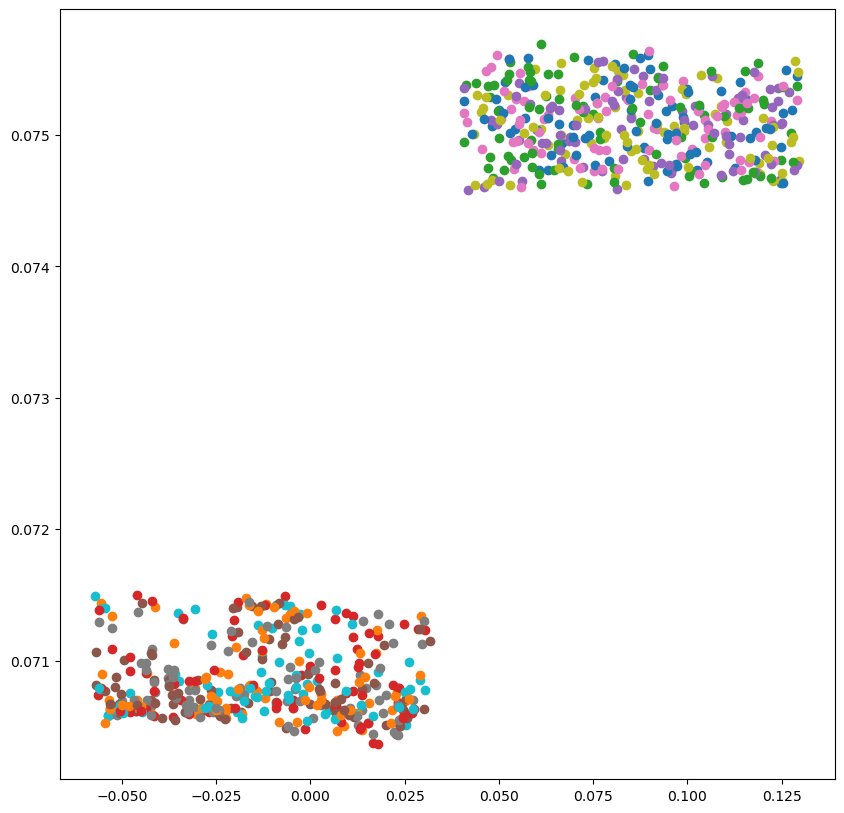

In [49]:
# Plot the start points and end points (each pair should have the same color)
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each row in the dataframe
for i, row in results_df.iterrows():
    ax.scatter(row['startpoint_z'], row['startpoint_y'])
    ax.scatter(row['endpoint_z'], row['endpoint_y'])

In [51]:
J_grid_downsampled

array([[               nan, -17465289.94143819, -17465289.94143819, ...,
        -17465289.94143819, -17465289.94143819, -17465289.94143819],
       [-17465289.94143819, -17465289.94143819, -17465289.94143819, ...,
        -17465289.94143819, -17465289.94143819, -17465289.94143819],
       [-17465289.94143819, -17465289.94143819, -17465289.94143819, ...,
        -17465289.94143819, -17465289.94143819, -17465289.94143819],
       ...,
       [-14056257.29217963, -14055108.19932388, -14053959.10646814, ...,
        -14055757.20286378, -14055667.96470375, -14055578.72654372],
       [-14056257.29217963, -14056257.29217963, -14056257.29217963, ...,
        -14056257.29217963, -14056257.29217963, -14056257.29217963],
       [-14056257.29217963, -14056257.29217963, -14056257.29217963, ...,
        -14056257.29217963, -14056257.29217963, -14056257.29217963]])

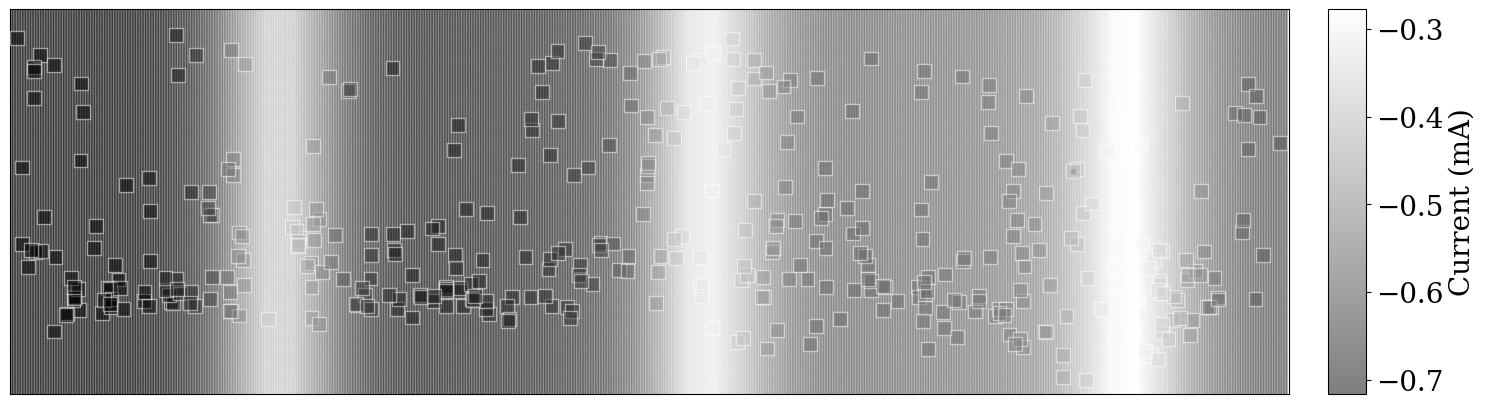

In [ ]:

# all fonts should be 20 and times new roman
plt.rcParams.update({'font.size': 20, 'font.family': 'serif'})


# Now let's plot the current values as scatter points on top of the current density plot
fig, ax = plt.subplots(figsize=(20, 5))

# Plot the current density

# Downsample by 5
Z_downsampled = Z_ground[::10, ::10]
Y_downsampled = Y_ground[::10, ::10]
J_grid_downsampled = J_grid_ground[::10, ::10]

contour = ax.scatter(Z_downsampled, Y_downsampled, c=J_grid_downsampled, cmap='gist_gray', s=1, alpha=0.25)

# Plot the wire endpoints
wireendpoints = ax.scatter(endpoints_df['z'], endpoints_df['y'], c=1000*endpoints_df['I'], cmap='gist_gray', s=100, alpha=0.5, marker='s', zorder=100, edgecolors='white')#, vmin=-0.1, vmax=0.1)

# Let's reflect the wire starting points' z coordinates about the ZMIDPOINT


# # Let's pick a random point of current endpoint and check where the neighbouring voxels are pictorially
# y_index = np.digitize(endpoints_df['y'].iloc[200], y_grid) - 1
# z_index = np.digitize(endpoints_df['z'].iloc[200], z_grid) - 1


# # Let's plot the voxel the endpoint is in
# ax.scatter(z_grid[z_index], y_grid[y_index], c='r', s=10, marker='o', alpha=0.1)

# Let's plot the voxels surrounding a random endpoint
voxels_surrounding_i = [(y, z) for y in range(y_index - 1, y_index + 2) for z in range(z_index - 1, z_index + 2) if 0 <= y < len(y_grid_ground) and 0 <= z < len(z_grid_ground)]

for y, z in voxels_surrounding_i:
    ax.scatter(z_grid_ground[z], y_grid_ground[y], c='black', s=10, marker='x', alpha=0.1)

# # Add a colorbar
# fig.colorbar(contour, ax=ax, label='Current Density (A/m^2)')
fig.colorbar(wireendpoints, ax=ax, label='Current (mA)', aspect=10, pad=0.025)
# fig.colorbar(contour, ax=ax, label='Current Density (A/m^2)', aspect=10, pad=0.05)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(Z_ground.min(), Z_ground.max())
ax.set_ylim(Y_ground.min(), Y_ground.max())

plt.savefig(figures.DIR_PATH / 'current_density_and_wire_endpoints.png', dpi=300, bbox_inches='tight')
# ax.axis('off')

z_index = 979
z_grid[z_index] = -0.04000596910841922


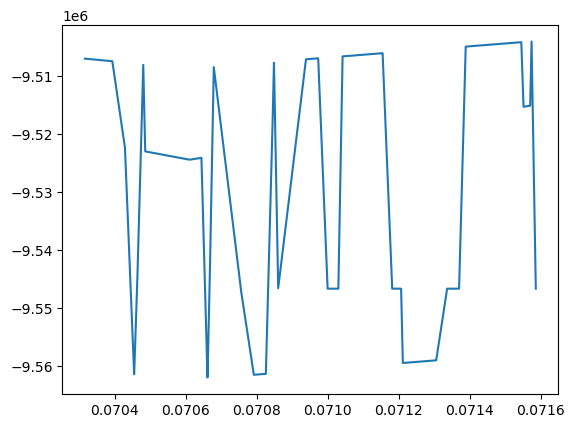

In [67]:
# Take a vertical slice of the J_grid at some z value

z_val = -0.04
z_index = np.digitize(z_val, z_grid) - 1
print(f'z_index = {z_index}')
print(f'z_grid[z_index] = {z_grid[z_index] }')

J_slice = J_grid[z_index, :]

fig, ax = plt.subplots()
ax.plot(y_grid, J_slice)
# ax.set_ylim(-9e-6, -8e-6)


In [ ]:
# I need to check if there are current density gradients in the y direction, let's sample the current density at a few points in the y direction

J_grid_y_samples = J_grid[:, ::1000]
J_grid_z_samples = J_grid[::1000, :]

y_diff = np.diff(y_grid[::1000])
z_diff = np.diff(z_grid[::1000])

J_y_gradients = np.diff(J_grid_y_samples, axis=0) / y_diff[:, None]
J_z_gradients = np.diff(J_grid_z_samples, axis=1) / z_diff


fig, ax = plt.subplots(figsize=(20, 20))

ax.plot(y_grid[::1000], J_y_gradients)

# ax.plot(z_grid, J_grid_y_samples)
# ax.plot(y_grid, J_grid_z_samples.T)
ax.set_xlabel('z (m)')
ax.set_ylabel('Current Density (A/m^2)')
ax.set_title('Current Density in the z direction at various y values')


ValueError: operands could not be broadcast together with shapes (4999,5) (4,1) 